In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
import zipfile
import os

# Upload the zip file
uploaded = files.upload()

# Assuming the zip file is named 'my_folder.zip'
zip_file_name = 'macau.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# List the contents of the extracted folder
os.listdir('/content/')

Saving macau.zip to macau.zip


['.config',
 'README.md',
 'drive',
 'requirements.txt',
 'LICENSE.md',
 '__init__.py',
 'setup.py',
 'macau.zip',
 'macau',
 'demos',
 'sample_data']

In [ ]:
files.upload()

Saving cicddos2019_dataset.csv to cicddos2019_dataset.csv
Buffered data was truncated after reaching the output size limit.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv("/content/cicddos2019_20kdataset.csv", encoding="latin-1")

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Jul 23 13:07:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
data.isna().sum()

Unnamed: 0                0
Protocol                  0
Flow Duration             0
Total Fwd Packets         0
Total Backward Packets    0
                         ..
Idle Std                  0
Idle Max                  0
Idle Min                  0
Label                     0
Class                     0
Length: 80, dtype: int64

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
data.values

array([[0, 17, 216631, ..., 0, 'UDP', 'Attack'],
       [1, 17, 2, ..., 0, 'UDP', 'Attack'],
       [2, 17, 48, ..., 0, 'UDP', 'Attack'],
       ...,
       [19997, 6, 172, ..., 0, 'Benign', 'Benign'],
       [19998, 6, 114894141, ..., 5074496, 'Benign', 'Benign'],
       [19999, 17, 21015, ..., 0, 'Benign', 'Benign']], dtype=object)

In [ ]:
~data.isin([np.nan, np.inf, -np.inf]).any(axis=1).sum()

-1

In [ ]:
# Cleaning the dataset to remove infinite values and missig values.
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)
data = clean_dataset(data)


In [ ]:
X = data.drop("Label", axis=1)
Y = data["Label"]
print(X.shape)

(0, 79)


In [ ]:
pip install lightgbm

In [ ]:
import numpy as np
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import lightgbm
from macau.MACAU import MACAU

#Import data
data = pd.read_csv("/content/cicddos2019_20kdataset.csv")
# Label encoding of the target variable
data["Label"] = np.where(data["Label"] == "BENIGN", 1, np.where(data["Label"] == "DoS Hulk",2, np.where(data["Label"] == "Dos GoldenEye",3,
 np.where(data["Label"] == "FTP-Patator",4, np.where(data["Label"] == "SSH-Patator",5, np.where(data["Label"] == "Dos slowloris",6,
 np.where(data["Label"] == "Dos Slowhttptest",7, np.where(data["Label"] == "Heartbleed",8,9))))))))
data["Class"] = np.where(data["Class"] == "Attack", 1, np.where(data["Class"] == "Benign", 2, 0))

# Cleaning the dataset to remove infinite values and missig values.
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)
data = clean_dataset(data)

# Seperating the dependent(Y) and indepedent variables(X)
data.drop("Label", axis=1, inplace = True)
X = data.drop("Class", axis=1)
Y = data["Class"]
print(X.shape)


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit and transform the data using PCA
pca = PCA(n_components=3)  # Set the number of principal components
X_pca = pca.fit_transform(X_scaled)

# Step 4: Examine the results
# Print the explained variance ratio (proportion of variance explained by each component)
# print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the principal components
# print("Principal components:\n", pca.components_)

# Convert the result back to a DataFrame for better readability
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
# # print("PCA result:\n", X_pca_df)

# Optional: Plot the PCA result
import matplotlib.pyplot as plt



(20000, 78)


In [ ]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_df, Y, test_size = 0.1)

In [ ]:
lgbm_model = lightgbm.LGBMClassifier(boosting_type = 'rf',
                                     importance_type = 'gain',
                                     n_estimators = 100,
                                     max_depth = -1,
                                     colsample_bytree = 1.0,
                                     subsample_freq = 1,
                                     subsample = 0.1,
                                     reg_alpha = 0,
                                     reg_lambda = 0,
                                     verbose = -1,
                                     num_leaves = 31,
                                     min_child_samples = 20,
                                     n_jobs = 10)

lgbm_model.fit(X_train, Y_train)
macau = MACAU(lgbm_model).fit(X_train, Y_train)

In [ ]:
x_grid, y_grid = np.meshgrid(X_test, Y_test)

In [ ]:
x_grid.shape

(2000, 6000)

In [ ]:
#np.vstack([x_grid.ravel(), y_grid.ravel()]).T.shape

In [ ]:
#np.hstack([grid_xy, np.random.normal(0, 1, grid_xy.shape[0]).reshape(-1, 1)]).shape

In [ ]:
import numpy as np


In [ ]:
# x_grid, y_grid = np.meshgrid(np.linspace(1.25 * X.min(axis = 0)[0], 1.25 * X.max(axis = 0)[0], 100),
#                              np.linspace(1.25 * X.min(axis = 0)[1], 1.25 * X.max(axis = 0)[1], 100))

x_grid, y_grid = np.meshgrid(X_test, Y_test)
grid_xy = np.vstack([x_grid.ravel(), y_grid.ravel()]).T
grid_xy = np.hstack([grid_xy, np.random.normal(0, 1, grid_xy.shape[0]).reshape(-1, 1)])

# predict
pred = macau.predict(grid_xy)

# feature novelty probabilities
shap_novelty_contributors, shap_conditional_novelty_contributors = macau.novelty_explanations(grid_xy, shap_values = True)

# SCD
novelty_contributors, conditional_novelty_contributors = macau.novelty_explanations(grid_xy, shap_values = False)

In [ ]:
x_grid.shape

(1000, 3000)

In [ ]:
grid_decision_surface = pred[:, 0].reshape((2000, -1)) # decision surface
grid_aleatoric_surface = pred[:, -3].reshape((2000, -1)) # aleatoric uncertainty
grid_epistemic_surface = pred[:, -2].reshape((2000, -1)) # epistemic uncertainty

grid_novelty_surface = pred[:, 2].reshape((2000, -1)) # novelty surface

grid_shap_x_surface = shap_novelty_contributors[:, 0].reshape((2000, -1))# x-axis novelty surface
grid_shap_y_surface = shap_novelty_contributors[:, 1].reshape((2000, -1)) # y-axis novelty surface
grid_shap_z_surface = shap_novelty_contributors[:, 2].reshape((2000, -1)) # z-axis novelty surface

grid_contrib_x_surface = novelty_contributors[:, 0].reshape((2000, -1)) # x-axis SCD surface
grid_contrib_y_surface = novelty_contributors[:, 1].reshape((2000, -1)) # y-axis SCD surface
grid_contrib_z_surface = novelty_contributors[:, 2].reshape((2000, -1)) # z-axis SCD surface

In [ ]:
118803 / 3

39601.0

In [ ]:
# grid_decision_surface.shape,
X_test.shape

(1000, 3)

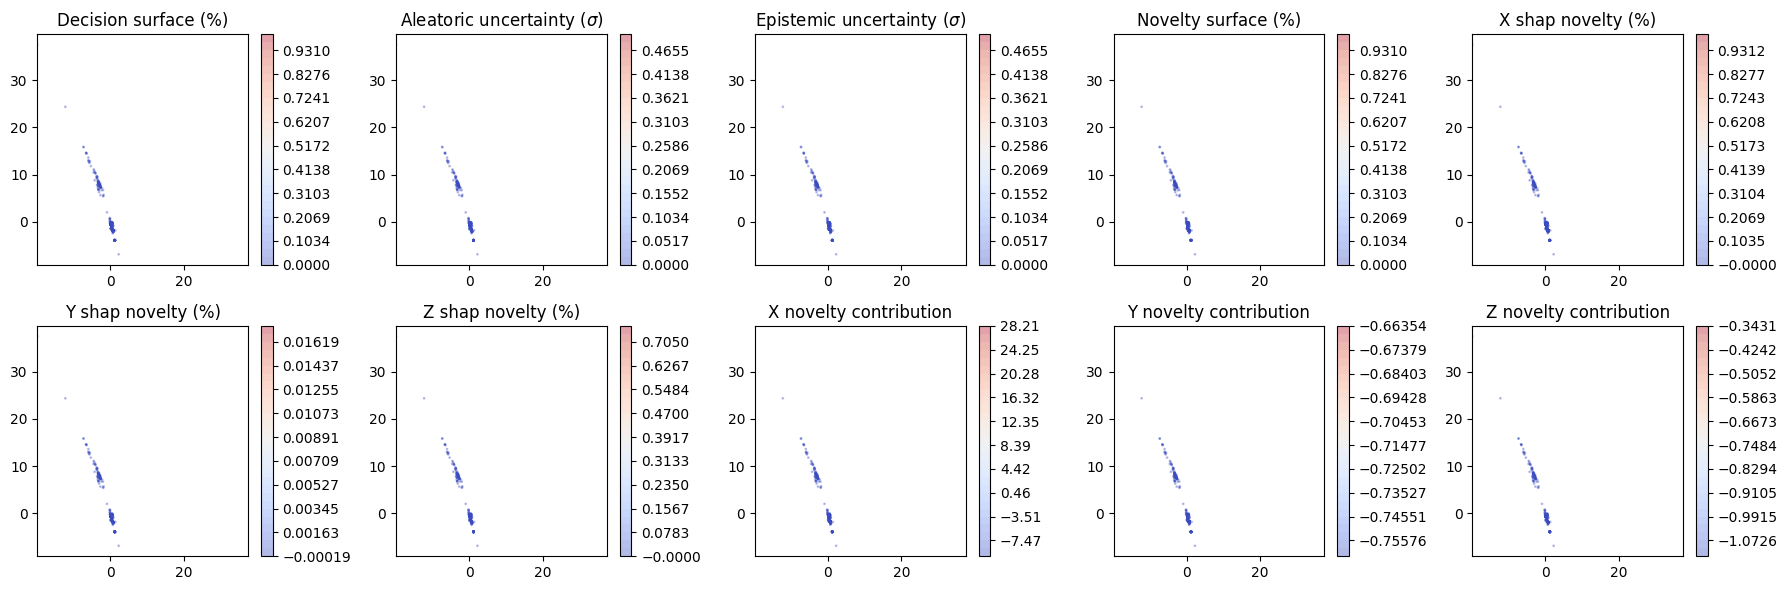

In [ ]:

fig, ax = plt.subplots(figsize = (18, 6), ncols = 5, nrows = 2)
ax = ax.ravel()
ax[0].set_title('Decision surface (%)')
ax[1].set_title(r'Aleatoric uncertainty ($\sigma$)')
ax[2].set_title(r'Epistemic uncertainty ($\sigma$)')
ax[3].set_title('Novelty surface (%)')
ax[4].set_title('X shap novelty (%)')
ax[5].set_title('Y shap novelty (%)')
ax[6].set_title('Z shap novelty (%)')
ax[7].set_title('X novelty contribution')
ax[8].set_title('Y novelty contribution')
ax[9].set_title('Z novelty contribution')

for axis in ax:
    axis.set_xlim(grid_xy[:, 0].min(), grid_xy[:, 0].max())

contour = ax[0].contourf(x_grid, y_grid, grid_decision_surface, levels = np.linspace(0.0, 1.0, 30), vmin = 0.0, vmax = 1.0, alpha = 0.4, cmap = 'coolwarm')
ax[0].scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c = Y_test, cmap = 'coolwarm', s = 1, alpha = 0.3, label = 'samples')
fig.colorbar(contour, ax = ax[0])

contour = ax[1].contourf(x_grid, y_grid, grid_aleatoric_surface, levels = np.linspace(0.0, 0.5, 30), vmin = 0.0, vmax = 0.5, alpha = 0.4, cmap = 'coolwarm')
ax[1].scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c = Y_test, cmap = 'coolwarm', s = 1, alpha = 0.3, label = 'samples')
fig.colorbar(contour, ax = ax[1])

contour = ax[2].contourf(x_grid, y_grid, grid_epistemic_surface, levels = np.linspace(0.0, 0.5, 30), vmin = 0.0, vmax = 0.5, alpha = 0.4, cmap = 'coolwarm')
ax[2].scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c = Y_test, cmap = 'coolwarm', s = 1, alpha = 0.3, label = 'samples')
fig.colorbar(contour, ax = ax[2])

contour = ax[3].contourf(x_grid, y_grid, grid_novelty_surface, levels = np.linspace(0.0, 1.0, 30), vmin = 0.0, vmax = 1.0, alpha = 0.4, cmap = 'coolwarm')
ax[3].scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c = Y_test, cmap = 'coolwarm', s = 1, alpha = 0.3, label = 'samples')
fig.colorbar(contour, ax = ax[3])

contour = ax[4].contourf(x_grid, y_grid, grid_shap_x_surface, levels = np.linspace(grid_shap_x_surface.min(), grid_shap_x_surface.max(), 30), alpha = 0.4, cmap = 'coolwarm')
ax[4].scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c = Y_test, cmap = 'coolwarm', s = 1, alpha = 0.3, label = 'samples')
fig.colorbar(contour, ax = ax[4])

contour = ax[5].contourf(x_grid, y_grid, grid_shap_y_surface, levels = np.linspace(grid_shap_y_surface.min(), grid_shap_y_surface.max(), 30), alpha = 0.4, cmap = 'coolwarm')
ax[5].scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c = Y_test, cmap = 'coolwarm', s = 1, alpha = 0.3, label = 'samples')
fig.colorbar(contour, ax = ax[5])

contour = ax[6].contourf(x_grid, y_grid, grid_shap_z_surface, levels = np.linspace(grid_shap_z_surface.min(), grid_shap_z_surface.max(), 30), alpha = 0.4, cmap = 'coolwarm')
ax[6].scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c = Y_test, cmap = 'coolwarm', s = 1, alpha = 0.3, label = 'samples')
fig.colorbar(contour, ax = ax[6])

contour = ax[7].contourf(x_grid, y_grid, grid_contrib_x_surface, levels = np.linspace(grid_contrib_x_surface.min(), grid_contrib_x_surface.max(), 30), alpha = 0.4, cmap = 'coolwarm')
ax[7].scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c = Y_test, cmap = 'coolwarm', s = 1, alpha = 0.3, label = 'samples')
fig.colorbar(contour, ax = ax[7])

contour = ax[8].contourf(x_grid, y_grid, grid_contrib_y_surface, levels = np.linspace(grid_contrib_y_surface.min(), grid_contrib_y_surface.max(), 30), alpha = 0.4, cmap = 'coolwarm')
ax[8].scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c = Y_test, cmap = 'coolwarm', s = 1, alpha = 0.3, label = 'samples')
fig.colorbar(contour, ax = ax[8])

contour = ax[9].contourf(x_grid, y_grid, grid_contrib_z_surface, levels = np.linspace(grid_contrib_z_surface.min(), grid_contrib_z_surface.max(), 30), alpha = 0.4, cmap = 'coolwarm')
ax[9].scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c = Y_test, cmap = 'coolwarm', s = 1, alpha = 0.3, label = 'samples')
fig.colorbar(contour, ax = ax[9])

fig.tight_layout()


In [ ]:
X_train.shape

(9000, 3)